In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [196]:
from pytest import skip


data = pd.read_csv("../../data/Ana Health_Tabela Modelo Previsão Churn - Tabela.csv", skiprows=1)

### Criando dataframe com dados com ocorrência única de won ou lost

In [197]:
data_simple = data[data['status'].isin(['won', 'lost'])]

In [198]:
data_simple['status'].value_counts()

won     551
lost    450
Name: status, dtype: int64

In [199]:
f1 = data_simple[(data_simple['status'] == 'won') & data_simple['contract_end_date'].isna()]
f2 = data_simple[(data_simple['status'] == 'lost') & data_simple['contract_end_date'].notna()]

data_simple = pd.concat([f1, f2])

<AxesSubplot:xlabel='contract_end_date'>

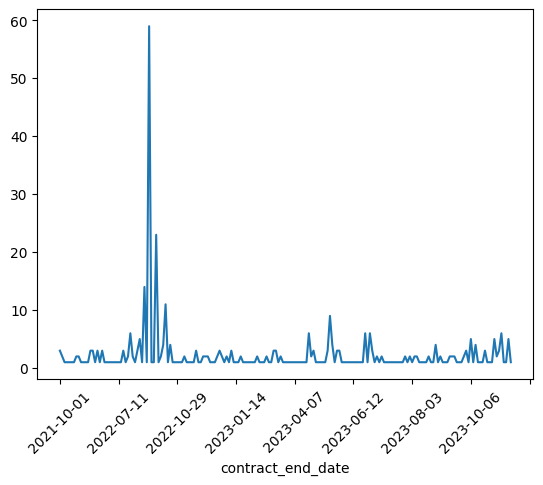

In [200]:
data_simple.groupby('contract_end_date')['status'].count().sort_index().rolling(1).sum().plot(rot=45)

In [201]:
data_simple['contract_end_date'] = pd.to_datetime(data_simple['contract_end_date'])

data_simple = data_simple.sort_values(by='contract_end_date')

In [202]:
data_simple

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
36,961,1974-07-04,63.0,80.0,Santa Catarina,Florianópolis,88080-080,NaN,NaN,2021-07-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
49,1022,1993-08-03,64.0,80.0,Santa Catarina,São José,88106-540,NaN,NaN,2021-07-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
48,1012,1988-04-06,64.0,80.0,Santa Catarina,Florianópolis,88090-060,NaN,NaN,2021-07-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
90,1321,1993-06-23,63.0,80.0,São Paulo,São Paulo,1241,NaN,NaN,2021-08-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
83,1289,1988-12-06,63.0,80.0,Minas Gerais,Salinas,39560-000,418.0,NaN,2021-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,5944,2001-10-23,64.0,80.0,Paraíba,João Pessoa,58052-310,NaN,NaN,2023-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


### Gráfico por mês

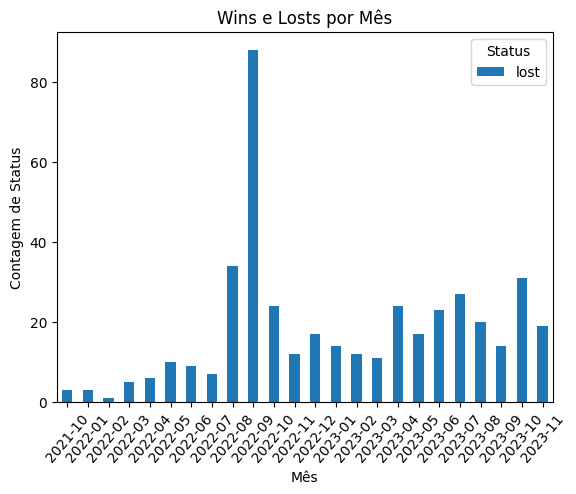

In [205]:
import matplotlib.pyplot as plt

# Agrupe os dados por 'contract_end_date' e 'status' e conte o número de cada 'status'
data_grouped = data_simple.groupby([data_simple['contract_end_date'].dt.to_period('M'), 'status']).size().unstack()

# Crie o gráfico de barras empilhadas
data_grouped.plot(kind='bar', stacked=False, rot=50)


# Adicione legendas e título ao gráfico
plt.xlabel('Mês')
plt.ylabel('Contagem de Status')
plt.title('Wins e Losts por Mês')
plt.legend(title='Status')

plt.show()

### Gráfico por ano

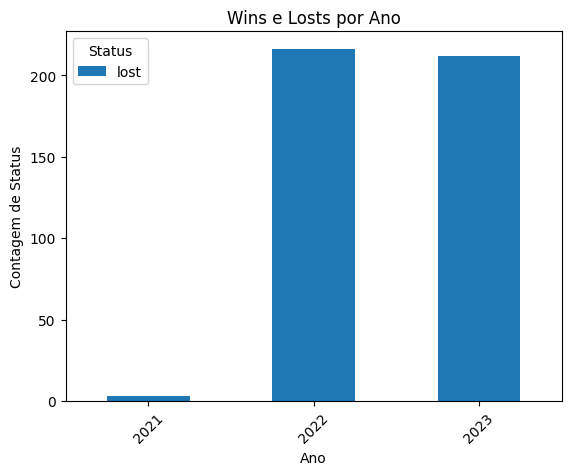

In [204]:
# Agrupe os dados por 'contract_end_date' e 'status' e conte o número de cada 'status'
data_grouped = data_simple.groupby([data_simple['contract_end_date'].dt.to_period('Y'), 'status']).size().unstack()

# Crie o gráfico
data_grouped.plot(kind='bar', stacked=True, rot=45)

# Adicione legendas e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Contagem de Status')
plt.title('Wins e Losts por Ano')
plt.legend(title='Status')

plt.show()